<a href="https://colab.research.google.com/github/VAISHNAVI02210/Oasisinfobyte/blob/main/Customer_Segmentation_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasisinfobyte Internship**

TASK 1: Customer Segmentation Task 2

AUTHOR: Vaishnavi Kale

BATCH: JANUARY Phase 1 AICTE OIB-SIP 2025.

**AIM**

The goal of this project is to segment customers based on their purchasing behavior and demographics using clustering techniques. This helps in targeted marketing, personalized promotions, and improving customer satisfaction, ultimately enhancing business strategy and revenue growth. 🚀

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jackdaoud_marketing_data_path = kagglehub.dataset_download('jackdaoud/marketing-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Load the dataset
data = pd.read_csv("/kaggle/input/marketing-data/ifood_df.csv")

In [ ]:
# Drop irrelevant columns
drop_cols = ['Z_CostContact', 'Z_Revenue']  # These columns are likely not useful for clustering
data.drop(columns=drop_cols, inplace=True)


In [ ]:
# Handling missing values
data.dropna(inplace=True)  # Drop rows with missing values

In [ ]:
# Feature Engineering: Aggregate spending
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

data['Children'] = data['Kidhome'] + data['Teenhome']


In [ ]:
# Select relevant features for clustering
features = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'NumWebVisitsMonth', 'Children']
X = data[features]

In [ ]:
# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


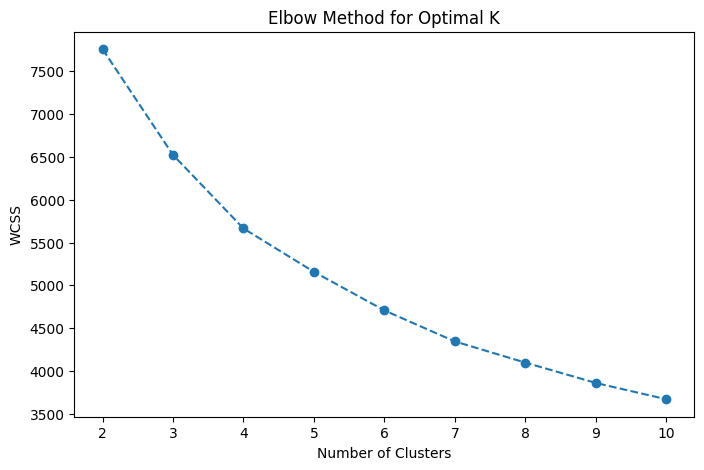

In [ ]:
# Finding optimal clusters using Elbow Method
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

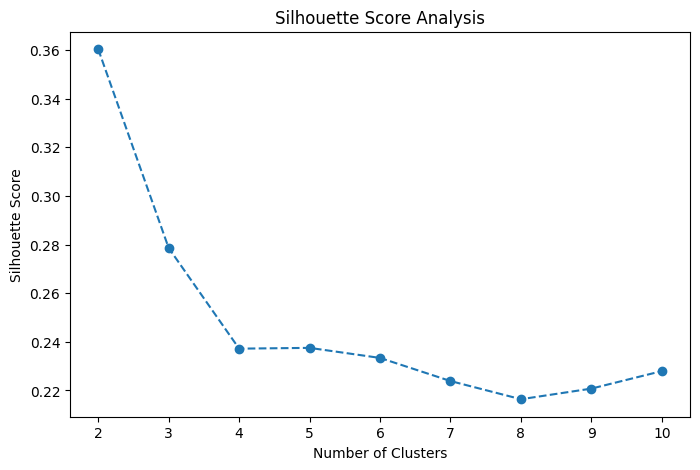

In [ ]:
# Using silhouette score to verify best k
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [ ]:
# Choose optimal k and apply K-Means
optimal_k = 4  # Adjust based on elbow & silhouette score analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)


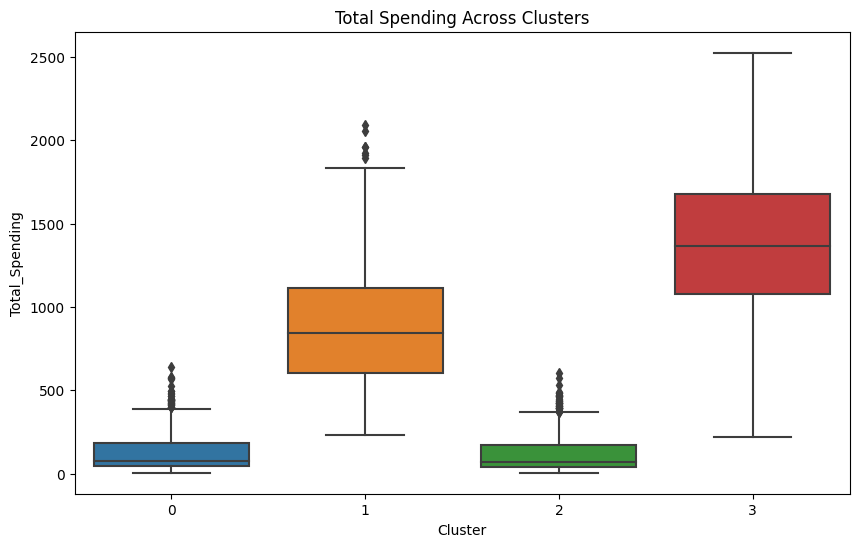

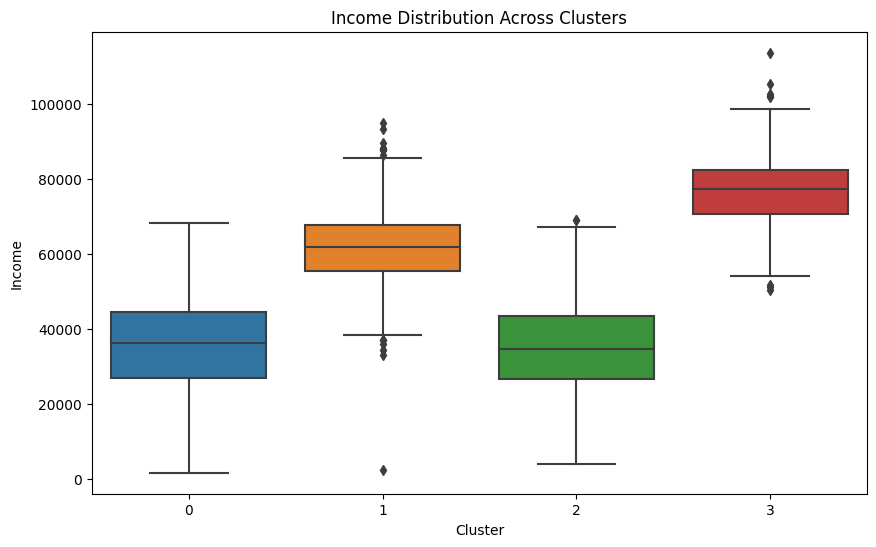

In [ ]:
# Analyze the clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_Spending', data=data)
plt.title('Total Spending Across Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Income Distribution Across Clusters')
plt.show()


In [ ]:
# Display cluster statistics
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

               Income    Recency  Total_Spending  Total_Purchases  \
Cluster                                                             
0        35775.098940  74.445230      128.618375         8.977032   
1        61903.923599  48.765705      892.848896        22.478778   
2        34939.461131  23.217314      122.192580         8.542403   
3        77150.551653  49.721074     1384.700413        19.983471   

         NumWebVisitsMonth  Children  
Cluster                               
0                 6.489399  1.296820  
1                 5.587436  1.127334  
2                 6.500000  1.167845  
3                 2.324380  0.068182  
